importing Jupyter notebook from ML_trial.ipynb
importing Jupyter notebook from EDA.ipynb
KNN: 0.7068980218281037 , RandomForest: 0.7068980218281037 , LogisticRegression 0.7068980218281037


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


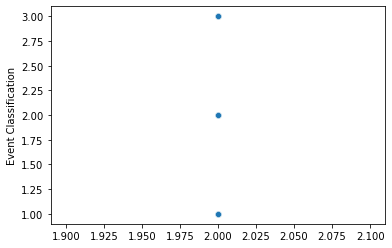

In [3]:
import import_ipynb
import numpy as np
import pandas as pd
import ML_trial#, EDA1
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cvec = CountVectorizer()
tfidf = TfidfVectorizer()

In [4]:
from nltk.corpus import stopwords

In [5]:
# copying file to avoid changing original
df = ML_trial.df.copy()
df.head()

Recalling Firm Name  Product Type  Recalling Firm Country  \
0  ELITE CONFECTIONERY LTD           0.0                     0.0   
1  ELITE CONFECTIONERY LTD           0.0                     0.0   
2  ELITE CONFECTIONERY LTD           0.0                     0.0   
3  ELITE CONFECTIONERY LTD           0.0                     0.0   
4  ELITE CONFECTIONERY LTD           0.0                     0.0   

                         Reason for Recall  \
0  Potential contamination with Salmonella   
1  Potential contamination with Salmonella   
2  Potential contamination with Salmonella   
3  Potential contamination with Salmonella   
4  Potential contamination with Salmonella   

                                 Product Description  Event Classification  
0  Elite Hazelnut & Almond Milk Chocolate Bar Net...                     1  
1  ELITE MILK CHOCOLATE BAR WITH STRAWBERRY CREAM...                     1  
2  ELITE POPPING ROCKS MILK CHOCOLATE BAR UPC:815...                     1  
3  ELITE WHITE CHOCOLATE BAR\tUPC:815871011471 & ...                     1  
4  ELITE MILK CHOCOLATE WITH BERRY FLAVOR TRUFFLE...                     1

In [6]:
#Cleaning the text column 'Reason for Recall'
stopwords = stopwords.words('english')
df['Reason_for_Recall'] = df['Reason for Recall'].apply(lambda x: ' '.join([w for w in x.split() if w not in (stopwords)]))

In [7]:
#replacing all digits in text column with none.
df['Reason_for_Recall'] = df['Reason_for_Recall'].str.replace('\d+', '')

<ipython-input-7-3a737ad79d99>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reason_for_Recall'] = df['Reason_for_Recall'].str.replace('\d+', '')


In [8]:
# Changing 'Reason for Recall' from object to string type before nlp
df['Reason_for_Recall']=df['Reason_for_Recall'].astype('string')
df.dtypes

Recalling Firm Name        object
Product Type              float64
Recalling Firm Country    float64
Reason for Recall          object
Product Description        object
Event Classification        int64
Reason_for_Recall          string
dtype: object

In [9]:
X = cvec.fit_transform(df['Reason_for_Recall']) #vectorization
np.shape(X) #shape matches df
list_of_words = list(cvec.vocabulary_.keys())

In [10]:
x = cvec.fit(df['Reason_for_Recall'])
#print(x.vocabulary_)

In [11]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
vect_df = pd.DataFrame(X.toarray(),columns=list_of_words)
vect_df.head()

potential  contamination  salmonella  the  pump  may  welding  defect  \
0          0              0           0    0     0    0        0       0   
1          0              0           0    0     0    0        0       0   
2          0              0           0    0     0    0        0       0   
3          0              0           0    0     0    0        0       0   
4          0              0           0    0     0    0        0       0   

   lead  malfunction  ...  pgy  happened  supplie  vy  mozaik  murocel  aet  \
0     0            0  ...    0         0        0   0       0        0    0   
1     0            0  ...    0         0        0   0       0        0    0   
2     0            0  ...    0         0        0   0       0        0    0   
3     0            0  ...    0         0        0   0       0        0    0   
4     0            0  ...    0         0        0   0       0        0    0   

   carbostyril  diazepam  tfrs  
0            0         0     0  
1            0         0     0  
2            0         0     0  
3            0         0     0  
4            0         0     0  

[5 rows x 22730 columns]

Computing frequency of words and max frequency

In [13]:
counts = np.asarray(X.sum(axis=0))
np.max(counts)

20164

In [14]:
freq_df = pd.DataFrame(counts, columns=list_of_words).T.sort_values(by=0,ascending=False)
freq_df.columns=['frequency']
freq_df

frequency
hybrigel           20164
latching           19548
norian             18750
zeros              14618
cisatracurium      12279
...                  ...
qfix                   1
mevion                 1
tilted                 1
faith                  1
equate                 1

[22730 rows x 1 columns]

The most important tokenized word in Reason for Recall is "salmonella" 

In [16]:
xx = tfidf.fit_transform(df['Reason_for_Recall'])
tf_idf = pd.DataFrame(xx[0].T.todense(), index=tfidf.get_feature_names(), columns=["TF-IDF"])
tf_idf = tf_idf.sort_values('TF-IDF', ascending=False)
tf_idf

TF-IDF
salmonella     0.664435
contamination  0.580164
potential      0.471101
_b             0.000000
piccolo        0.000000
...                 ...
femtouch       0.000000
femoral        0.000000
females        0.000000
female_xd_     0.000000
zyto           0.000000

[22730 rows x 1 columns]

In [21]:
#exporting needed tables for visualization in separate software

# import os
# os.makedirs('Exported_tables', exist_ok=True)
# freq_df.to_csv('Exported_tables/word_frequency_df.csv')
# tf_idf.to_csv('Exported_tables/tf_idf.csv')
#vect_df.to_csv('Exported_tables/X_data(vectorized_attributes).csv')